# Introduction to Eigenvalues and Eigenvectors

## The Mousetrap Problem

Consider the following problem: a mouse is set loose in a house with the floorplan pictured below, and we are going to track the mouse's movements over time. At each time step, the mouse will exit the room it currently occupies, and it will choose an adjacent room to enter uniformly at random. Now, Room 1 contains a mousetrap. If the mouse enters room 1, then it will with probability 10% be caught in the trap in the next time step; if not caught it again exits the room, choosing which adjacent room to enter again uniformly at random. The question we would like to answer is: what happens over the long-term? Is the mouse guaranteed to eventually get caught in the trap? Or could it end up wandering the house forever, always avoiding the trap in room 1?

![Floorplan](assets/mousetrap.png "Floorplan")

This is a problem where the outcomes are probabilistic, and we can use a type of matrix called a transition matrix to model them (we will define the term 'transition matrix' formally below). First, define the state of the mouse being caught in the trap as state 0, and the state of the mouse being in room 1 but not in the trap as state 1. Then define the state of the mouse being in room $k$ as state $k$ for $2\leq k \leq 9$. Let $M$ be a matrix where the entry in position $i, j$ is the probability of the mouse moving from state $j$ to state $i$. **Note:** We are switching to 0-based indexing now! The matrix then looks like this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
plt.style.use('bmh')


# I like to enter my probabilities in the rows (which corresponds to state i -> state j), then transpose the matrix
M = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0.1, 0, 0.45, 0.45, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0.25, 0, 0, 0.25, 0.25, 0.25, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0.5, 0, 0, 0, 0.5, 0, 0],
              [0, 0, 0, 0, 0, 0, 1/3, 0, 1/3, 1/3],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
             ],
            dtype=np.float64)
M = M.T
print(M)

[[1.         0.1        0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.25       0.         0.
  0.         0.         0.         0.        ]
 [0.         0.45       0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.45       0.         0.         1.         1.
  0.5        0.         0.         0.        ]
 [0.         0.         0.         0.25       0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.25       0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.25       0.         0.
  0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5        0.         1.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.

The matrix above captures the probabilities of transitioning between different states in the system, but it does not track the state of the system, nor the probability of being in a particular state at a particular time. Suppose we define a 'state vector' $\mathbf{s}_t$ with 10 components where the entry in the $i^{th}$ component is the probability that the mouse is in the corresponding state (room) at time $t$. Then, for example, if we placed the mouse in room 9 at time $t=0$, we would represent that with the vector 

$$
    \mathbf{s}_0 = \begin{bmatrix}
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        1
                    \end{bmatrix},
$$

where component 9 (0-based indexing!!!) is 1 because the mouse has probability 100% of being in room 9 if we just placed it there.

Now the matrix and the state vector work together to model the state of the system over time: $M\mathbf{s}_t = \mathbf{s}_{t+1}$. Let's see what happens over a few time steps. 

In [2]:
s_0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=np.float64)
s_0 = s_0.T

s_1 = M @ s_0
print(s_1)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


As expected, if the mouse starts in room 9, then after one time step, with 100% probability the mouse is in room 7. Let's take another step.

In [3]:
s_2 = M @ s_1
print(s_2)

[0.         0.         0.         0.         0.         0.
 0.33333333 0.         0.33333333 0.33333333]


Now things are less certain. There is a 1/3 probability that the mouse is in room 8, and corresponding probabilities that the mouse is in room 6 or back in room 9. We don't know the actual choice the mouse has made, but we have a model for the likelihood of the mouse being in a particular location at a particular time step.

In [4]:
s_3 = M @ s_2
print(s_3)

[0.         0.         0.         0.16666667 0.         0.
 0.         0.83333333 0.         0.        ]


In [5]:
s_4 = M @ s_3
print(s_4)

[0.         0.04166667 0.         0.         0.04166667 0.04166667
 0.31944444 0.         0.27777778 0.27777778]


In [6]:
s_5 = M @ s_4
print(s_5)

[0.00416667 0.         0.01875    0.26180556 0.         0.
 0.         0.71527778 0.         0.        ]


After 5 steps, there is a (very) slight chance that the mouse is caught in the trap: the probability in state 0 is now 0.00416667. Let's now run the experiment for several hundred time steps and store the states of the system as we run it in an array.

In [7]:
nsteps = 500

states = np.empty((nsteps, 10), dtype=np.float64)
states[0, :] = s_0
for t in range(nsteps - 1):
    states[t+1, :] = M @ states[t]
    states[t + 1, :] = states[t + 1, :] / sum(states[t + 1, :])  # normalization to address floating point arithmetic errors 

Let's plot the state of the system at each time step to see how it evolves.

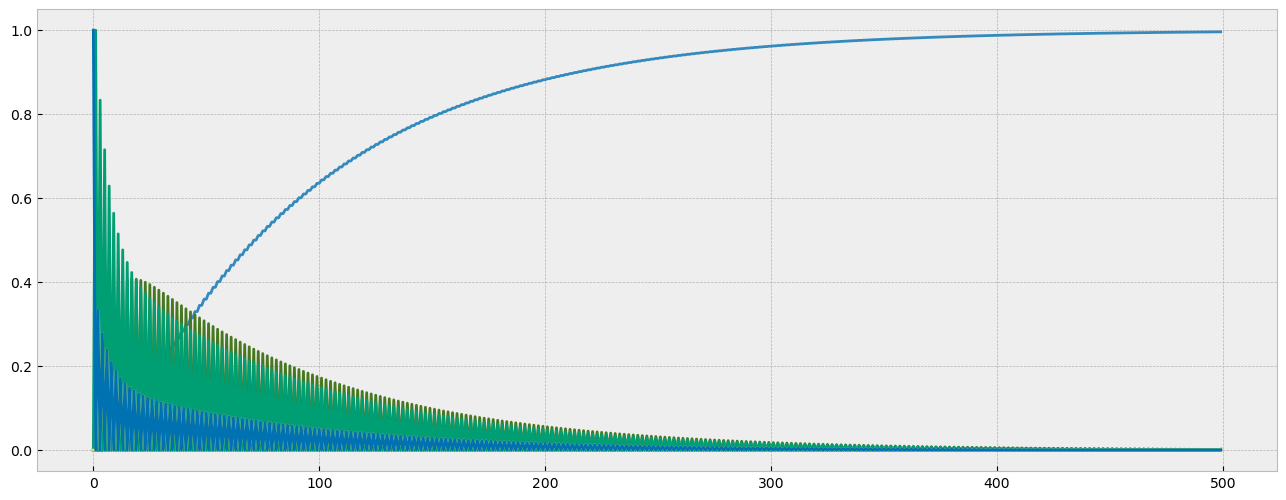

In [8]:
from IPython.core.pylabtools import figsize
figsize(16, 6)
plt.plot(states);

In under 100 time steps, it's clear that one outcome is much more probable than the others. The final state of the system shows a nearly 100% probability that the mouse is caught in the trap.

In [9]:
states[-1, :]

array([9.95973817e-01, 0.00000000e+00, 4.12863330e-04, 1.93667772e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.67664155e-03,
       0.00000000e+00, 0.00000000e+00])

What if we had set the mouse loose in a different room; for example, how about room 2? Would changing the initial state of the system change anything about the long-term behavior of the system?

[9.97025727e-01 6.62667459e-04 0.00000000e+00 0.00000000e+00
 3.57671805e-04 3.57671805e-04 7.70535134e-04 0.00000000e+00
 4.12863330e-04 4.12863330e-04]


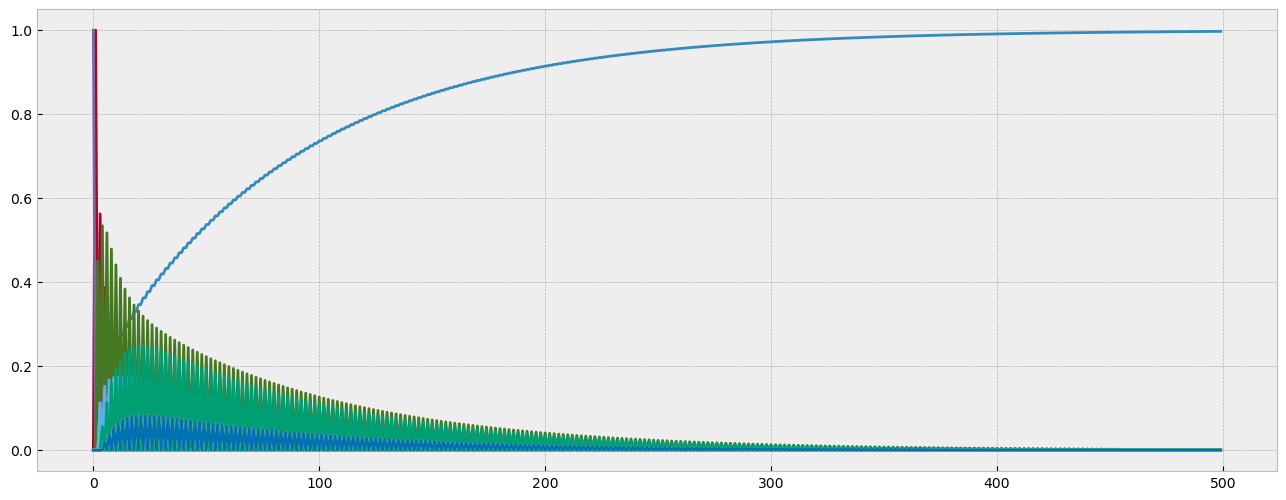

In [10]:
s = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
s = s.T

nsteps = 500

states = np.empty((nsteps, 10))
states[0, :] = s
for t in range(nsteps - 1):
    states[t+1, :] = M @ states[t]
    states[t + 1, :] = states[t + 1, :] / sum(states[t + 1, :])  # normalization to address floating point arithmetic errors 

print(states[-1, :])
plt.plot(states);

It appears not - there is a slight increase in the probability that the mouse is caught in the trap after 500 time steps, but the probability is already nearly 100% and the difference is almost negligible.

## Ignore the Initial State

It is the case that in fact the initial state of a system like this does not have any effect on the long-term, 'steady-state' of the system. To see this, let's take a look at powers of the transition matrix $M$: for 'large' $n$, what does $M^n$ look like?

In [11]:
pow_M = np.copy(M)
for _ in range(500):
    pow_M = pow_M @ M

print(np.round(pow_M))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Remember what the entries in $M$ represent: entry $m_{i,j}$ is the probability the system transitions in a single time step from state $j$ to state $i$. The entries in the $n^{th}$ power of $M$ can be thought of as the probability the system transitions  from state $j$ to state $i$ over $n$ time steps. So what we can observe here is that over 500 time steps, there is a 100% probability (rounding off) that regardless of the initial state of the system, the mouse ends up in the trap.

In fact, it is possible to determine this without even doing the matrix multiplies in the previous cell, but rather by analyzing $M$ itself. Let's step away from this example for now and plan to return shortly.

## Eigenvalues and Eigenvectors

```{admonition} Definition: Eigenvalues and eigenvectors
Suppose $A$ is a square matrix. A vector $\mathbf{x}$ such that $A\mathbf{x} = \lambda\mathbf{x}$ for a scalar $\lambda$ is called an *eigenvector* of $A$, while the scalar $\lambda$ is called an eigenvalue of $A$.
```

Geometrically, this definition is saying that when $A$ multiplies one of its eigenvectors, it does not change its direction, though it may scale it (strictly speaking, it could scale by a negative number, which would flip the vector's direction but the product would remain on the same line). If we think of square $n\times n$ matrices as representing geometric transformations of $\mathbb{R}^n$, the eigenvectors are then analogous to 'fixed points' of the transformation. To initially motivate why these vectors might be useful, suppose we have a $2\times 2$ matrix $A$ with distinct eigenvalues $\lambda_1, \lambda_2$ and distinct linearly independent eigenvectors $\mathbf{x}_1, \mathbf{x}_2$. Suppose $\mathbf{u}$ is a vector in $\mathbb{R}^2$ given as follows:

$$
    \mathbf{u} = \begin{bmatrix}
                    u_1 \\
                    u_2
                \end{bmatrix}.
$$

Imagine we want to understand what $A$ does to $\mathbb{R}^2$. We can try looking at $A\mathbf{u}$, and it will be helpful here if we express $\mathbf{u}$ in terms of a basis for $\mathbb{R}^2$; in the absence of any reason to choose another one, let's use the standard basis:

$$
    A\mathbf{u} = A\begin{bmatrix}
                        u_1 \\
                        u_2
                    \end{bmatrix} 
                = A(u_1\begin{bmatrix}
                        1 \\
                        0
                        \end{bmatrix} + 
                     u_2\begin{bmatrix}
                        0 \\
                        1
                        \end{bmatrix}) 
                = u_1 A \begin{bmatrix}
                         1 \\
                         0
                        \end{bmatrix} + 
                  u_2 A \begin{bmatrix}
                         0 \\
                         1
                        \end{bmatrix}.
$$

What the equation above is telling us is that we determine what $A$ does to $\mathbf{u}$ by determining what $A$ does to the basis vectors, and for each of the basis vectors this will often involve both a change in scale and a change in direction. 

But we have assumed that $A$ has two distinct, linearly independent eigenvectors, therefore we could use the eigenvectors of $A$ as a basis for $\mathbb{R}^2$ instead and write $\mathbf{u} = c_1\mathbf{x}_1 + c_2\mathbf{x}_2$ as a linear combination of the eigenvectors $\mathbf{x}_1, \mathbf{x}_2$ of $A$. Then, our analysis looks as follows:

$$
    A\mathbf{u} = A(c_1\mathbf{x}_1 + c_2\mathbf{x}_2) = c_1A\mathbf{x}_1 + c_2A\mathbf{x}_2 = c_1\lambda_1\mathbf{x}_1 + c_2\lambda_2\mathbf{x}_2.
$$

Here, the multiplication by $A$ results in simply scaling in the directions of the eigenvectors, the direction changes have been removed, and this simplifies the analysis.

Note that while I have used $\mathbb{R}^2$ for the above example, nothing above is specific to $\mathbb{R}^2$: we can do the same thing in $\mathbb{R}^n$ or any other vector space as long as the matrix we are working with has enough linearly independent eigenvectors to span the space (spoiler: unfortunately, that is not always the case).

## Calculating Eigenvalues and Eigenvectors - Preliminaries

For reasons we will get in to shortly,  eigenvalues and eigenvectors for matrices of size greater than $5\times5$ must almost always be approximated, and for anything greater than $2\times2$ is often quite tedious to do by hand. However, there are several important theoretical aspects that we can observe by calculating the eigenvalues and eigenvectors of $2\times 2$ matrices by hand, so we will illustrate a few examples here. 

```{admonition} Important: $N(A-\lambda I)$
:class: important

Suppose that $A\mathbf{x} = \lambda\mathbf{x}$. Then $A\mathbf{x}-\lambda\mathbf{x} = \mathbf{0}$, and if we include $I$, we can factor out $\mathbf{x}$ on the left-hand side:

$$
    \begin{align*}
        A\mathbf{x}-\lambda\mathbf{x}  &= \mathbf{0} \\
        A\mathbf{x}-\lambda I\mathbf{x} &= \mathbf{0} \\
        (A-\lambda I)\mathbf{x}         &= \mathbf{0}
    \end{align*}
$$

and this implies that $\mathbf{x} \in N(A-\lambda I)$.
```

```{admonition} Definition: The Determinant
The *determinant* of a A $2\times2$ matrix $A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$ is the function

$$
    det(A) = |A| = ad - bc.
$$
```

The determinant is defined for square matrices of any size and it contains a great deal of useful information about the matrix from which it is calculated, but as detailed in Appendix A, the $2\times 2$ case is quite special; the formula for calculating determinants of general $n\times n$ matrices is fantastically computationally expensive, and as a result determinants are not particularly useful for applications; they are mainly used for toy examples or the occasional low-dimensional problem. 

One important feature of the determinant that we will use here is that if $det(A) = 0$, then $A$ is singular, which is equivalent to $A$ having a nontrivial nullspace. For a $2\times2$ matrix $A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$, we can see this is the case because $ad - bc = 0$ is equivalent to the rows of $A$ being scalar multiples of each other, which in turn means that rref$(A)$ has a row of zeros and therefore a free variable. However, right now we aren't interested in $A$, we are interested in $A-\lambda I$, which looks like

$$
    \begin{bmatrix}
        a & b \\
        c & d
    \end{bmatrix} - \lambda
    \begin{bmatrix}
        1 & 0 \\
        0 & 1
    \end{bmatrix} = 
    \begin{bmatrix}
        a - \lambda & b \\
        c & d-\lambda
    \end{bmatrix},
$$

and if we do the analogous computation we get $(a-\lambda)(d-\lambda) - bc = 0$, which simplifies to $\lambda^2 - (a + d)\lambda + (ad - bc) = 0$. This equation $det(A-\lambda I) = 0$ is called the *characteristic equation* of $A$, and its roots are the eigenvalues of $A$.

```{admonition} Definition: The Characteristic Equation
For a $n\times n$ matrix $A$, the equation $det(A - \lambda I) = 0$, where $\lambda$ is a scalar, is called the *characteristic equation* of $A$. The characteristic equation of $A$ is a polynomial of degree $n$; for $A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$, the characteristic equation is $\lambda^2 - (a + d)\lambda + (ad - bc) = 0$, or equivalently, $\lambda^2 - tr(A)\lambda + det(A) = 0$, where $tr(A)$ denotes the *trace* of $A$, defined as the sum of the diagonal entries of $A$. The roots of the characteristic equation are the eigenvalues of $A$.
```

Because the characteristic equation is defined in terms of determinants and determinants are not calculable for most real world applications, it follows that the characteristic equation is not calculable for most real-world examples, though it can be proven that for any square $n\times n$ matrix $A$, there exists a polynomial of degree $n$ whose roots are the eigenvalues of $A$. Moreover, there is no general closed-form formula for finding the roots of a polynomial of degree 5 or greater, so even if we go to the trouble of producing the characteristic equation, we aren't guaranteed to be able to find the eigenvalues from it explicitly; we need instead to rely on an approximation process. All this is to say that the procedure that follows for finding the eigenvalues and eigenvectors of $2\times2$ matrices doesn't generalize to larger matrices.

## Calculating Eigenvalues and Eigenvectors - Process (By Hand)

For a $2\times 2$ matrix $A$, we can find the eigenvalues and eigenvectors as follows:

- Solve the characteristic equation $det(A-\lambda I) = 0$. The roots are the eigenvalues of $A$.
- For each eigenvalue, solve the matrix equation $(A - \lambda I)\mathbf{x} = \mathbf{0}$ for *nontrivial* vectors $\mathbf{x}$ (the zero vector is always a solution to this equation; we are interested in nontrivial solutions).  

**Example:** Find the eigenvalues and eigenvectors of $A = \begin{bmatrix} 1 & 1 \\ -1 & 3 \end{bmatrix}$.

First, set up and solve the characteristic equation:

$$
    \begin{align}
        det(A - \lambda I) &= 0 \\
        det(\begin{bmatrix} 1 & 1 \\ -1 & 3 \end{bmatrix} - \lambda \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}) &= 0 \\
        det(\begin{bmatrix} 1 - \lambda & 1 \\ -1 & 3 - \lambda \end{bmatrix}) &= 0 \\
        (1-\lambda)(3-\lambda) - (-1)\cdot1 &= 0 \\
        \lambda^2 - 4\lambda + 3 + 1 &= 0 \\
        \lambda^2 - 4\lambda + 4 &= 0 \\
        (\lambda - 2)(\lambda - 2) &= 0 \\
        \lambda &= 2 \text{ (multiplicity 2)}
    \end{align}
$$

This matrix has only one distinct eigenvalue, so we only need to set up and solve $(A-\lambda I)\mathbf{x} = \mathbf{0}$ once. First, set up the matrix on the left:

$$
    \begin{bmatrix} 
        1 & 1 \\
        -1 & 3
    \end{bmatrix} - 2
    \begin{bmatrix}
        1 & 0 \\
        0 & 1
    \end{bmatrix} = 
    \begin{bmatrix} 
        1 & 1 \\
        -1 & 3
    \end{bmatrix} - 
    \begin{bmatrix}
        2 & 0 \\
        0 & 2
    \end{bmatrix} =
    \begin{bmatrix}
        -1 & 1 \\
        -1 & 1
    \end{bmatrix}.
$$

Next, augment the matrix with the zero vector and row-reduce:

$$
    \begin{bmatrix}
        -1 & 1 & | 0 \\
        -1 & 1 & | 0
    \end{bmatrix} \sim
    \begin{bmatrix}
        -1 & 1 & | 0 \\
         0 & 0 & | 0
    \end{bmatrix}.
$$

Setting the free variable corresponding to column 2 to 1, we can see that the pivot variable in column 1 must also equal 1 in order to satisfy the equation corresponding to row 1 ($-x_1 + x_2 = 0$). So a solution (i.e. an eigenvector of $A$ corresponding to the eigenvalue of 2) is 

$$
    \mathbf{x} = 
    \begin{bmatrix}
        1 \\
        1
    \end{bmatrix}.
$$

This example is somewhat defective in the sense that it is preferable for an $n\times n$ matrix to have $n$ linearly independent eigenvectors (this is necessary if we wish to use the eigenvectors as a basis for the column space of $A$ as illustrated above), but unfortunately that does not always happen. 

**Example:** Find the eigenvalues and eigenvectors of $A = \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}$.

First, set up and solve the characteristic equation:

$$
    \begin{align}
        det(A - \lambda I) &= 0 \\
        det(\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} - \lambda \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}) &= 0 \\
        det(\begin{bmatrix} 1 - \lambda & 1 \\ 1 & 1 - \lambda \end{bmatrix}) &= 0 \\
        (1-\lambda)(1-\lambda) - 1\cdot1 &= 0 \\
        \lambda^2 - 2\lambda + 1 - 1 &= 0 \\
        \lambda^2 - 2\lambda &= 0 \\
        \lambda(\lambda - 2) &= 0 \\
        \lambda &= 0, 2
    \end{align}
$$

0 can be an eigenvalue of a matrix; in fact, this happens when $A$ is singular (why?). Since we have two distinct eigenvalues, we need to set up and solve $(A-\lambda I)\mathbf{x} = \mathbf{0}$ twice this time. First, set up the matrix on the left using $\lambda_1 = 0$:

$$
    \begin{bmatrix} 
        1 & 1 \\
        1 & 1
    \end{bmatrix} - 0
    \begin{bmatrix}
        1 & 0 \\
        0 & 1
    \end{bmatrix} = 
    \begin{bmatrix} 
        1 & 1 \\
        1 & 1
    \end{bmatrix}.
$$

Next, augment the matrix with the zero vector and row-reduce:

$$
    \begin{bmatrix}
        1 & 1 & | 0 \\
        1 & 1 & | 0
    \end{bmatrix} \sim
    \begin{bmatrix}
        1 & 1 & | 0 \\
         0 & 0 & | 0
    \end{bmatrix}.
$$

Setting the free variable corresponding to column 2 to 1, we can see that the pivot variable in column 1 must equal -1 in order to satisfy the equation corresponding to row 1 ($x_1 + x_2 = 0$). So a solution (i.e. an eigenvector of $A$ corresponding to the eigenvalue $\lambda_1=0$) is 

$$
    \mathbf{x}_1 = 
    \begin{bmatrix}
        -1 \\
        1
    \end{bmatrix}.
$$

Now set up the matrix on the left using $\lambda_2 = 2$:

$$
    \begin{bmatrix} 
        1 & 1 \\
        1 & 1
    \end{bmatrix} - 2
    \begin{bmatrix}
        1 & 0 \\
        0 & 1
    \end{bmatrix} = 
        \begin{bmatrix} 
        1 & 1 \\
        1 & 1
    \end{bmatrix} - 
    \begin{bmatrix}
        2 & 0 \\
        0 & 2
    \end{bmatrix} = 
    \begin{bmatrix} 
        -1 & 1 \\
        1 & -1
    \end{bmatrix},
$$

and we saw this matrix occur in the previous example, so we know that a solution is 

$$
    \mathbf{x}_2 = 
    \begin{bmatrix}
        1 \\
        1
    \end{bmatrix}.
$$

That gives us two distinct, linearly independent eigenvectors $\mathbf{x}_1$, $\mathbf{x}_2$ corresponding to the two distinct eigenvalues $0, 2$.

```{admonition} Note: Eigenvectors can be scaled
:class: important

It is important to note that eigenvectors can be scaled (that is, multiplied by any scalar) and they will remain eigenvectors. It is often desirable to work with unit eigenvectors, which can be obtained in the usual way by dividing the eigenvectors by their lengths. Virtually every software tool for calculating eigenvectors does this automatically and returns unit eigenvectors.
```

```{admonition} Other Situations
:class: important 

The characteristic equation of a $2\times 2$ real matrix $A$ is a polynomial of degree 2 with real coefficients. This polynomial may not factor, but its roots can be obtained using the quadratic formula, and it can have 1 repeated root, 2 distinct real roots, or two complex conjugate roots. If the roots are complex conjugates, then the eigenvectors are also complex conjugates. Some orthogonal matrices (rotation matrices, for example) have complex conjugate roots.
```

**Example:** Find the eigenvalues and eigenvectors of $A = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$.

First, set up and solve the characteristic equation:

$$
    \begin{align}
        det(A - \lambda I) &= 0 \\
        det(\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} - \lambda \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}) &= 0 \\
        det(\begin{bmatrix} - \lambda & -1 \\ 1 & - \lambda \end{bmatrix}) &= 0 \\
        \lambda^2 - (-1)\cdot1 &= 0 \\
        \lambda^2 + 1 &= 0 \\
        \lambda &= \pm i,
    \end{align}
$$

where $i=\sqrt{-1}$. Since we have two distinct eigenvalues, we need to set up and solve $(A-\lambda I)\mathbf{x} = \mathbf{0}$ twice again. First, set up the matrix on the left using $\lambda_1 = +i$:

$$
    \begin{bmatrix} 
        0 & -1 \\
        1 & 0
    \end{bmatrix} - i
    \begin{bmatrix}
        1 & 0 \\
        0 & 1
    \end{bmatrix} = 
    \begin{bmatrix} 
        -i & -1 \\
        1 & -i
    \end{bmatrix}.
$$

If you haven't worked with complex numbers in the past it may not be immediately obvious, but that matrix has rank 1 (i.e. the rows are scalar multiples of each other). So, we will augment the matrix with the zero vector and row-reduce:

$$
    \begin{bmatrix}
        -i & -1 & | 0 \\
        1 & -i & | 0
    \end{bmatrix} \overset{R_2 - iR_1 \to R_2}{\sim}
    \begin{bmatrix}
        -i & -1 & | 0 \\
         0 & 0 & | 0
    \end{bmatrix}.
$$

Setting the free variable corresponding to column 2 to 1, we can see that the pivot variable in column 1 must equal i in order to satisfy the equation corresponding to row 1 ($-ix_1 - x_2 = 0$). So a solution (i.e. an eigenvector of $A$ corresponding to the eigenvalue $\lambda_1=0) is 

$$
    \mathbf{x}_1 = 
    \begin{bmatrix}
        i \\
        1
    \end{bmatrix}.
$$

Now set up the matrix on the left using $\lambda_2 = -i$:

$$
    \begin{bmatrix} 
        0 & -1 \\
        1 & 0
    \end{bmatrix} + i
    \begin{bmatrix}
        1 & 0 \\
        0 & 1
    \end{bmatrix} = 
    \begin{bmatrix} 
        i & -1 \\
        1 & i
    \end{bmatrix}.
$$

As before it may not be immediately obvious, but that matrix has rank 1 (i.e. the rows are scalar multiples of each other). So, we will augment the matrix with the zero vector and row-reduce:

$$
    \begin{bmatrix}
        i & -1 & | 0 \\
        1 & i & | 0
    \end{bmatrix} \overset{R_2 + iR_1\to R_2}{\sim}
    \begin{bmatrix}
        i & -1 & | 0 \\
         0 & 0 & | 0
    \end{bmatrix}.
$$

Setting the free variable corresponding to column 2 to 1, we can see that the pivot variable in column 1 must equal -i in order to satisfy the equation corresponding to row 1 ($ix_1 - x_2 = 0$). So a solution (i.e. an eigenvector of $A$ corresponding to the eigenvalue $\lambda_1=0$) is 

$$
    \mathbf{x}_1 = 
    \begin{bmatrix}
        -i \\
        1
    \end{bmatrix}.
$$

That gives us two distinct, linearly independent eigenvectors $\mathbf{x}_1$, $\mathbf{x}_2$ corresponding to the two distinct eigenvalues $\pm i$.

Notice that these eigenvectors can be separated into real and imaginary parts, for example

$$
    \mathbf{x}_1 = \begin{bmatrix}
                        i \\
                        1
                    \end{bmatrix} = 
                    \begin{bmatrix}
                        0 \\
                        1
                    \end{bmatrix} + i
                    \begin{bmatrix}
                        1 \\
                        0
                    \end{bmatrix},
$$

and we can decompose $\mathbf{x}_2$ similarly. In fact, it is the case that if a matrix has a complex eigenvalue $\lambda_1=a + bi$, then it has the complex conjugate $\lambda_2=a-bi$ as an eigenvalue also, and if we write the eigenvector $\mathbf{x}_1$ corresponding to $\lambda_1$ in the form $\mathbf{x}_1 = \mathbf{a} + i\mathbf{b}$ as demonstrated above, then the eigenvector corresponding to the complex conjugate eigenvalue $\lambda_2$ is simply $\mathbf{x}_2 = \mathbf{a} - i\mathbf{b}$. This can be used to cut the computation time of the eigenvectors in half.

## Markov Processes and Markov Matrices

Let's return now to the problem that we began the section with.

```{admonition} Definition: Markov Process
A *Markov process* or *Markov chain* is a stochastic (random) process describing a sequence of events where the probability of each event at time $t+1$ is determined only by the state attained at time $t$. This 'memoryless' property is called the *Markov property*.
```

The scenario we considered above is a Markov process: at time $t$, to determine where the mouse ends up next it doesn't matter which rooms the mouse travelled to in the past, only where the mouse currently is.

```{admonition} Definition: Probability Vector
A vector of nonnegative real numbers whose entries sum to 1 is called a *probability vector*.

In the scenario above, the state vector is a probability vector.

```{admonition} Definition: Markov Matrix
A (left or column) *Markov* matrix, *transition* matrix, or *stochastic* matrix is a square matrix of nonnegative real numbers whose columns sum to 1.
```

In the scenario above, the transition matrix is a left Markov matrix. The 'left' designator refers to the fact that this matrix appears on the left when multiplying with a probability vector to determine the next state of the system.

```{admonition} Eigenvalues of Markov Matrices
Markov matrices always have 1 as an eigenvalue, and moreover, every other eigenvalue of a Markov matrix is less than 1 in magnitude.
```

```{admonition} Definition: Principal Eigenvector

The eigenvector associated with the largest magnitude eigenvalue of a matrix (any matrix, not only a Markov matrix) is referred to as the *principal eigenvector* of the matrix.
```

Suppose that a Markov matrix $M$ has $n$ linearly independent eigenvectors $\mathbf{x}_1,\dots,\mathbf{x}_n$. Without loss of generality, suppose that $\lambda_1=1$, and thus $\lambda_2,\dots,\lambda_n$ are all less than 1 in magnitude. Now assume that we have a state vector $\mathbf{s}$ and we write it using the eigenvectors of $M$ as previously described:

$$
    \mathbf{s} = c_1\mathbf{x}_1 + \cdots + c_n\mathbf{x}_n,
$$

where $c_1,\dots, c_n$ are scalars. If we multiply $\mathbf{s}$ by $M$ $k$ times, assuming $k$ to be a 'large' number, the following happens:

$$
    \begin{align}
        M^k\mathbf{s} &= M^k(c_1\mathbf{x}_1 + \cdots + c_n\mathbf{x}_n) \\
                      &= c_1M^k\mathbf{x}_1 + \cdots + c_nM^k\mathbf{x}_n \\
                      &= c_1\lambda_1^k\mathbf{x}_1 + \cdots + c_n\lambda_n^k\mathbf{x}_n \\
                      &\approx c_1\mathbf{x}_1,
    \end{align}
$$

where the approximation in the last step comes from the fact that for $2 \leq i \leq n$, because $|\lambda_i| < 1$, $\lambda_i^k \approx 0$ for large $k$, but $\lambda_1^k = 1^k = 1$.

This tells us that the steady-state of a Markov process is not dependent on the initial state of the system: over the long term, the system tends to the principal eigenvector of the transition matrix.

Let's finish this section by looking at the eigenvalues and eigenvectors of the transition matrix $M$ from the problem that we started with. This matrix is $10\times 10$, so we will use SciPy to facilitate the calculation of the eigenvalues and eigenvectors.

In [12]:
eigenvalues, eigenvectors = la.eig(M)

In [13]:
eigenvalues

array([ 1.00000000e+00+0.j, -9.88797258e-01+0.j, -8.52195506e-01+0.j,
       -5.62917520e-01+0.j,  9.88797258e-01+0.j,  8.52195506e-01+0.j,
        5.62917520e-01+0.j, -9.50554706e-18+0.j,  3.29243140e-17+0.j,
        0.00000000e+00+0.j])

Note that SciPy uses `j` to denote $\sqrt{-1}$ and returns eigenvalue information as complex numbers, but in this example the imaginary part of every eigenvalue is 0, and the largest magnitude eigenvalue is indeed 1, which is the first eigenvalue. The principal eigenvector, then, will be the first column returned in `eigenvectors`.

In [14]:
eigenvectors[:, 0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

That corresponds to the steady state of the system after it ran for a long time regardless of the state it started in, and it also corresponds to every column of $M$ when we calculated $M^k$ for 'large' $k$. This single vector contains all the information we need to understand the long-term behavior of the system.